# Bitcoin Price Prediction: LSTM vs Linear Regression

**Research Question:** Is the LSTM machine learning algorithm more effective than linear regression in predicting bitcoin market movements?

This notebook compares two machine learning approaches:
1. **Linear Regression** - A simple, interpretable model
2. **LSTM (Long Short-Term Memory)** - A neural network for time-series data

## Table of Contents
1. Setup and Imports
2. Data Loading and Exploration
3. Linear Regression Model
4. LSTM Model
5. Model Evaluation and Comparison
6. Conclusion

## 1. Setup and Imports

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# TensorFlow/Keras for LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("All libraries imported successfully!")

TensorFlow version: 2.20.0
All libraries imported successfully!


## 2. Data Loading and Exploration

In [2]:
# Load the Bitcoin dataset
df = pd.read_csv('data/bitcoin_prices.csv')

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 10 rows:")
df.head(10)

Dataset Shape: (565, 2)

First 10 rows:


,Day,Open
0,1,13.781
1,2,13.737
2,3,13.550
3,4,13.950
4,5,14.134
5,6,15.580
6,7,15.566
7,8,14.834
8,9,15.480
9,10,15.332


In [3]:
# Check data types and statistics
print("Data Types:")
print(df.dtypes)
print("\nBasic Statistics:")
df.describe()

Data Types:
Day       int64
Open    float64
dtype: object

Basic Statistics:


,Day,Open
count,565.000000,565.000000
mean,283.000000,40.152740
std,163.245725,10.704507
min,1.000000,13.550000
25%,142.000000,34.319000
50%,283.000000,40.494000
75%,424.000000,47.193000
max,565.000000,63.524000


In [4]:
# Verify data sum is within float limits (max float = 3.402823e+38)
# Prices are in thousands to prevent overflow
print("Sum of Open prices:", df['Open'].sum())
print("Max float value: 3.402823e+38")
print("Data is safe to use!")

Sum of Open prices: 22686.298
Max float value: 3.402823e+38
Data is safe to use!


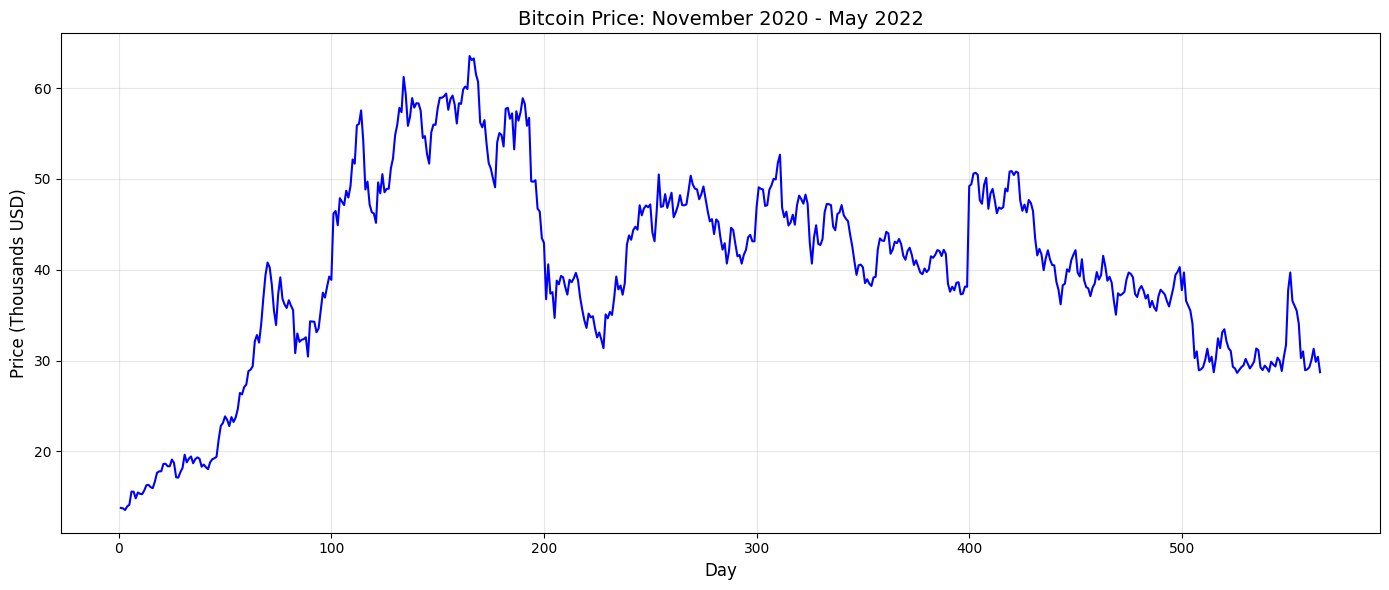


Dataset covers 565 days
Price range: $13550 - $63524


In [5]:
# Visualize the Bitcoin price dataset
plt.figure(figsize=(14, 6))
plt.plot(df['Day'], df['Open'], color='blue', linewidth=1.5)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Price (Thousands USD)', fontsize=12)
plt.title('Bitcoin Price: November 2020 - May 2022', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDataset covers {len(df)} days")
print(f"Price range: ${df['Open'].min()*1000:.0f} - ${df['Open'].max()*1000:.0f}")

## 3. Linear Regression Model

Linear Regression establishes a relationship between independent and dependent variables using the equation:

$$Y = \theta_2 X + \theta_1$$

Where:
- Y = dependent variable (Bitcoin price)
- X = independent variable (Day)
- θ₂ = gradient (slope)
- θ₁ = y-intercept

In [ ]:
# Prepare data for Linear Regression
X = df['Day'].values.reshape(-1, 1)
y = df['Open'].values

# Split: 70% train, 15% validation, 15% test -- maintain the golden rule in ML
train_end = int(len(X) * 0.70)
val_end = int(len(X) * 0.85)

X_train_lr = X[:train_end]
X_val_lr = X[train_end:val_end]
X_test_lr = X[val_end:]
y_train_lr = y[:train_end]
y_val_lr = y[train_end:val_end]
y_test_lr = y[val_end:]

print(f"Training set size: {len(X_train_lr)}")
print(f"Validation set size: {len(X_val_lr)}")
print(f"Testing set size: {len(X_test_lr)}")

NameError: name 'df' is not defined

In [7]:
# Build and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Get model parameters
gradient = lr_model.coef_[0]
intercept = lr_model.intercept_

print(f"Linear Regression Equation: Y = {gradient:.6f}X + {intercept:.6f}")
print(f"\nGradient (θ₂): {gradient}")
print(f"Y-Intercept (θ₁): {intercept}")

Linear Regression Equation: Y = 0.046620X + 32.018998

Gradient (θ₂): 0.04661963592748145
Y-Intercept (θ₁): 32.018998162308044


In [8]:
# Make predictions ONLY on test set (proper ML practice - never evaluate on training data)
y_pred_lr_test = lr_model.predict(X_test_lr)

# Calculate evaluation metrics on TEST SET ONLY
mse_lr = mean_squared_error(y_test_lr, y_pred_lr_test)
r2_lr = r2_score(y_test_lr, y_pred_lr_test)

print("Linear Regression Performance (Test Set Only):")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"R-squared (R²): {r2_lr:.4f}")
print(f"\nThe model explains {r2_lr*100:.1f}% of the variance in unseen Bitcoin prices")

Linear Regression Performance (Test Set Only):
Mean Squared Error (MSE): 583.9721
R-squared (R²): -43.7169

The model explains -4371.7% of the variance in unseen Bitcoin prices


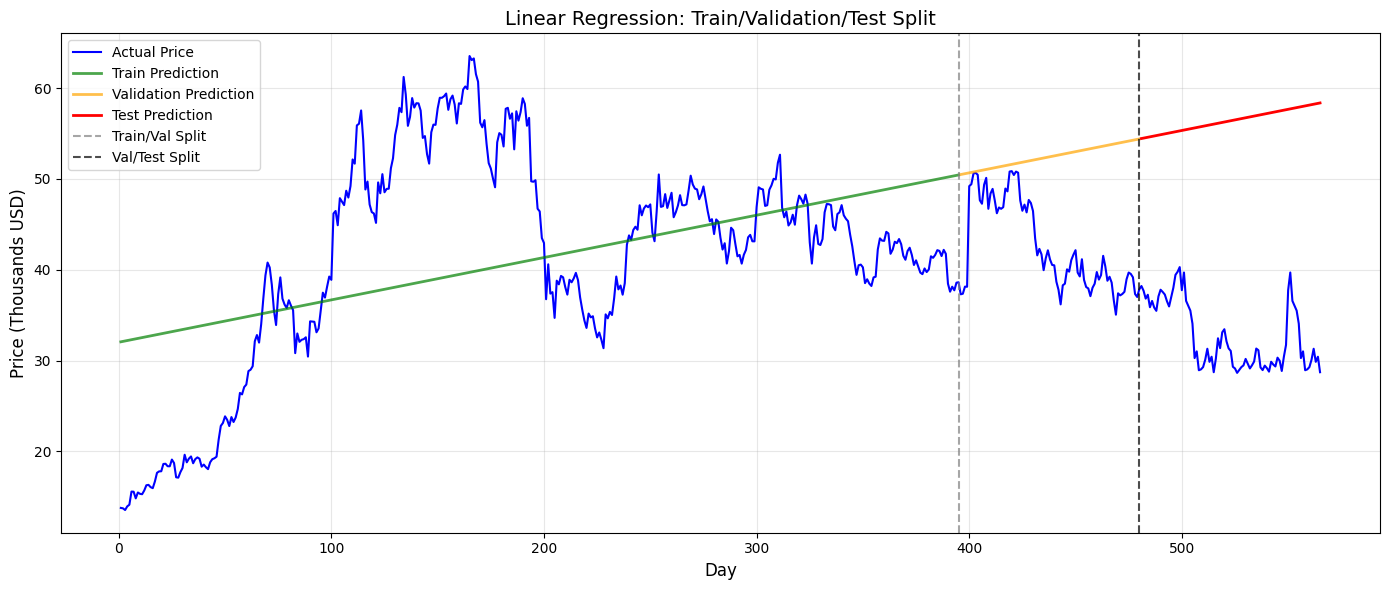

In [9]:
# Visualize Linear Regression results (showing train/val/test split)
plt.figure(figsize=(14, 6))

# Plot actual prices
plt.plot(df['Day'], df['Open'], color='blue', label='Actual Price', linewidth=1.5)

# Plot predictions for each split
y_pred_lr_train = lr_model.predict(X_train_lr)
y_pred_lr_val = lr_model.predict(X_val_lr)

plt.plot(X_train_lr.flatten(), y_pred_lr_train, color='green', label='Train Prediction', linewidth=2, alpha=0.7)
plt.plot(X_val_lr.flatten(), y_pred_lr_val, color='orange', label='Validation Prediction', linewidth=2, alpha=0.7)
plt.plot(X_test_lr.flatten(), y_pred_lr_test, color='red', label='Test Prediction', linewidth=2)

# Add vertical lines to show splits
plt.axvline(x=X_train_lr[-1], color='gray', linestyle='--', alpha=0.7, label='Train/Val Split')
plt.axvline(x=X_val_lr[-1], color='black', linestyle='--', alpha=0.7, label='Val/Test Split')

plt.xlabel('Day', fontsize=12)
plt.ylabel('Price (Thousands USD)', fontsize=12)
plt.title('Linear Regression: Train/Validation/Test Split', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. LSTM Model

Long Short-Term Memory (LSTM) is a type of recurrent neural network designed for learning long-term dependencies in sequential data. It operates through a three-step process:

1. **Forget Gate**: Decides which information to discard from the cell state
2. **Input Gate**: Decides which new information to store in the cell state
3. **Output Gate**: Decides what to output based on the cell state

In [10]:
# Prepare data for LSTM
# LSTM requires data to be scaled between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Open'].values.reshape(-1, 1))

print(f"Original data range: {df['Open'].min():.2f} - {df['Open'].max():.2f}")
print(f"Scaled data range: {scaled_data.min():.2f} - {scaled_data.max():.2f}")

Original data range: 13.55 - 63.52
Scaled data range: 0.00 - 1.00


In [11]:
# Create sequences for LSTM
# We use a lookback window to predict the next value
def create_sequences(data, lookback=60):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 60  # Use 60 days of history to predict the next day
X_lstm, y_lstm = create_sequences(scaled_data, lookback)

# Reshape for LSTM [samples, timesteps, features]
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

print(f"LSTM Input Shape: {X_lstm.shape}")
print(f"LSTM Output Shape: {y_lstm.shape}")

LSTM Input Shape: (505, 60, 1)
LSTM Output Shape: (505,)


In [12]:
# Split: 70% train, 15% validation, 15% test (proper ML practice)
train_size = int(len(X_lstm) * 0.70)
val_size = int(len(X_lstm) * 0.85)

X_train_lstm = X_lstm[:train_size]
X_val_lstm = X_lstm[train_size:val_size]
X_test_lstm = X_lstm[val_size:]
y_train_lstm = y_lstm[:train_size]
y_val_lstm = y_lstm[train_size:val_size]
y_test_lstm = y_lstm[val_size:]

print(f"Training samples: {len(X_train_lstm)}")
print(f"Validation samples: {len(X_val_lstm)}")
print(f"Testing samples: {len(X_test_lstm)}")

Training samples: 353
Validation samples: 76
Testing samples: 76


In [13]:
# Build the LSTM model
lstm_model = Sequential([
    # First LSTM layer with dropout
    LSTM(units=50, return_sequences=True, input_shape=(lookback, 1)),
    Dropout(0.2),
    
    # Second LSTM layer with dropout
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    
    # Third LSTM layer with dropout
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    
    # Output layer
    Dense(units=1)
])

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Display model architecture
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the LSTM model
# Use VALIDATION set for monitoring, NOT test set (proper ML practice)
print("Training LSTM model...")
history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_lstm, y_val_lstm),  # Validation, NOT test!
    verbose=1
)

Training LSTM model...


Epoch 1/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - loss: 0.4617


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3964


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3423


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2983


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.1699 - val_loss: 0.0152


Epoch 2/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0199


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0218


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0255


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0271


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0288 - val_loss: 0.0078


Epoch 3/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0131


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0159


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0164


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0167


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0176 - val_loss: 0.0036


Epoch 4/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0159


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0211


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0218


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0214


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0200 - val_loss: 0.0141


Epoch 5/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0130


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0164


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0163


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0161


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0156 - val_loss: 0.0036


Epoch 6/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0063


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0121


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0137


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0144


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0159 - val_loss: 0.0129


Epoch 7/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0100


 2/12 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0121


 3/12 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0125


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0132


 6/12 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0135 


 9/12 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0136


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0137


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0137 - val_loss: 0.0036


Epoch 8/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0091


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0130


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0142


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0147


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0159 - val_loss: 0.0064


Epoch 9/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0168


 3/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0157


 5/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0153


 6/12 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0150


 8/12 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0148


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0145


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0144


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0139 - val_loss: 0.0045


Epoch 10/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0129


 3/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0132


 5/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0132


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0132


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0133


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0137 - val_loss: 0.0035


Epoch 11/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0123


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0136


 6/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0142


 8/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0144


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0144


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0145 - val_loss: 0.0049


Epoch 12/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0121


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0125


 6/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0128


 8/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0130


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0132


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0135 - val_loss: 0.0043


Epoch 13/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0107


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0122


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0126


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0125


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - val_loss: 0.0054


Epoch 14/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0099


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0110


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0115


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0114


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0119 - val_loss: 0.0036


Epoch 15/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0124


 3/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0128


 5/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0134


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0135


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0134


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0135 - val_loss: 0.0023


Epoch 16/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0121


 3/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0137


 6/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0156


 9/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0156


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0157


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0156 - val_loss: 0.0080


Epoch 17/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0089


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0111


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0117


 9/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0120


11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0121


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0125 - val_loss: 0.0082


Epoch 18/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0124


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0129


 6/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0124


 8/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0123


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0121


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0118 - val_loss: 0.0025


Epoch 19/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0102


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0105


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0104


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0104


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0104 - val_loss: 0.0027


Epoch 20/20



 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0076


 4/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0090


 7/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0093


10/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0095


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0100 - val_loss: 0.0021


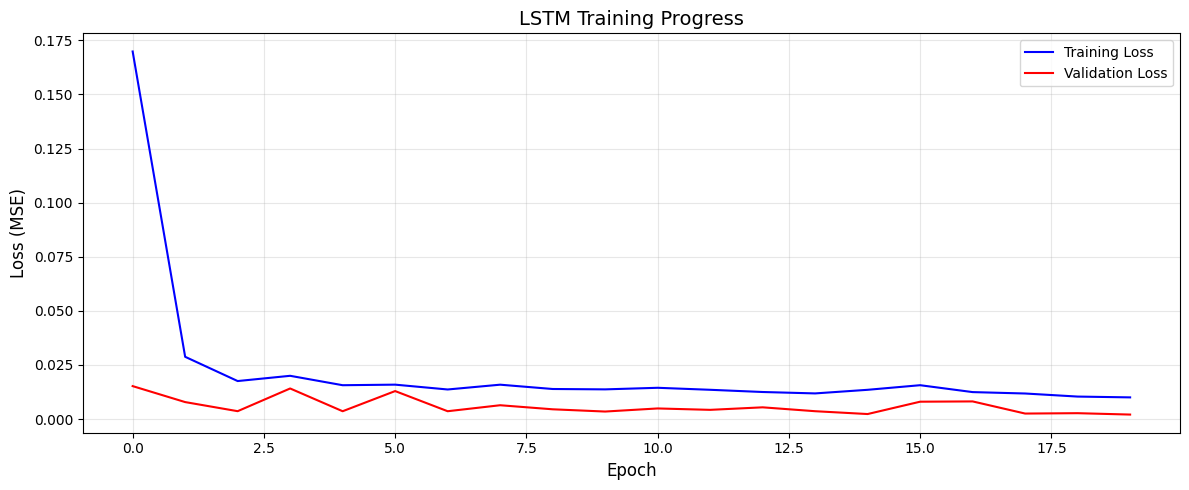

In [15]:
# Visualize the training loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('LSTM Training Progress', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
# Make predictions ONLY on test set (proper ML practice)
y_pred_lstm_scaled = lstm_model.predict(X_test_lstm)

# Inverse transform to get actual prices
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled).flatten()
y_actual_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1, 1)).flatten()

print(f"Generated {len(y_pred_lstm)} test predictions (unseen data)")


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step 


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


Generated 76 test predictions (unseen data)


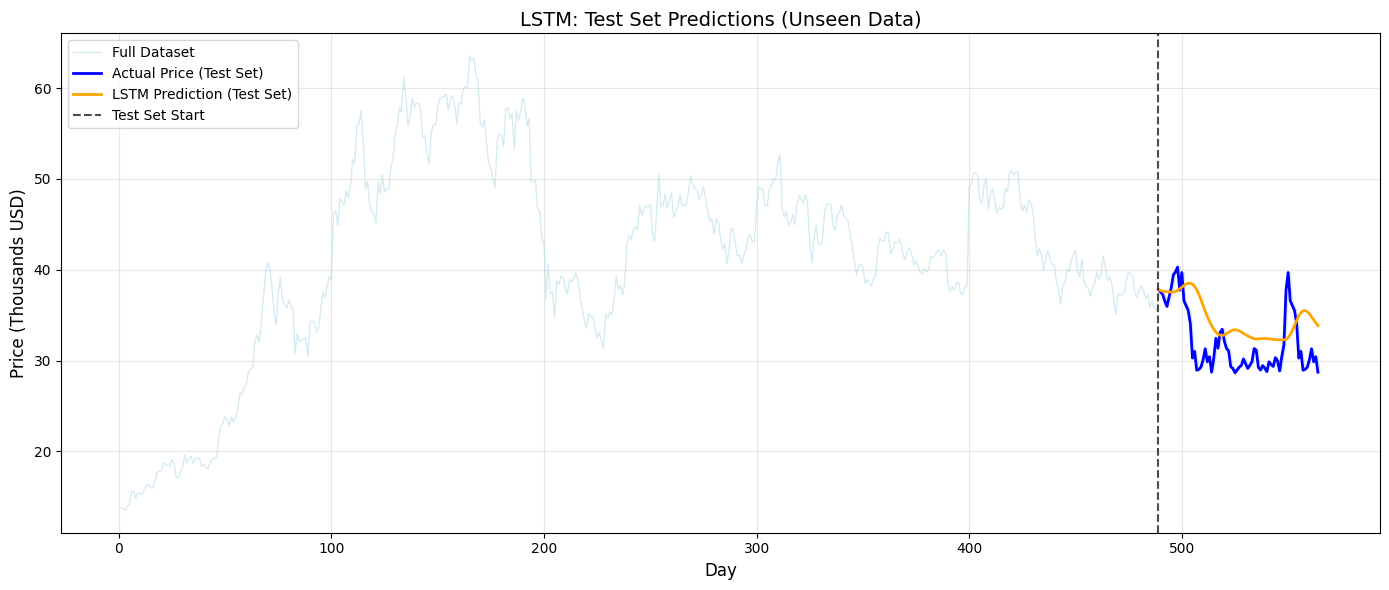

In [17]:
# Visualize LSTM results (test set only - proper ML practice)
plt.figure(figsize=(14, 6))

# Calculate the starting day index for test set
test_start_idx = lookback + train_size + len(X_val_lstm)
test_days = range(test_start_idx, test_start_idx + len(y_pred_lstm))

# Plot full dataset as context
plt.plot(df['Day'], df['Open'], color='lightblue', label='Full Dataset', linewidth=1, alpha=0.5)

# Plot test predictions
plt.plot(test_days, y_actual_lstm, color='blue', label='Actual Price (Test Set)', linewidth=2)
plt.plot(test_days, y_pred_lstm, color='orange', label='LSTM Prediction (Test Set)', linewidth=2)

# Add vertical line showing test region
plt.axvline(x=test_start_idx, color='black', linestyle='--', alpha=0.7, label='Test Set Start')

plt.xlabel('Day', fontsize=12)
plt.ylabel('Price (Thousands USD)', fontsize=12)
plt.title('LSTM: Test Set Predictions (Unseen Data)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Model Evaluation and Comparison

In [18]:
# Calculate error margins for both models
# Using TEST SET ONLY (proper ML practice - no data leakage)

# Linear Regression errors (test set only)
lr_errors = np.abs(y_test_lr - y_pred_lr_test)
lr_avg_error = np.mean(lr_errors)

# LSTM errors (test set only)
lstm_errors = np.abs(y_actual_lstm - y_pred_lstm)
lstm_avg_error = np.mean(lstm_errors)

print("=" * 50)
print("ERROR MARGIN COMPARISON (TEST SET ONLY)")
print("=" * 50)
print(f"\nLinear Regression Average Error: {lr_avg_error:.4f} (thousands USD)")
print(f"LSTM Average Error: {lstm_avg_error:.4f} (thousands USD)")
print(f"\nIn actual USD:")
print(f"Linear Regression: ${lr_avg_error * 1000:.2f}")
print(f"LSTM: ${lstm_avg_error * 1000:.2f}")
print(f"\nNote: These metrics are on UNSEEN data only (proper ML evaluation)")

ERROR MARGIN COMPARISON (TEST SET ONLY)

Linear Regression Average Error: 23.7654 (thousands USD)
LSTM Average Error: 3.2574 (thousands USD)

In actual USD:
Linear Regression: $23765.35
LSTM: $3257.41

Note: These metrics are on UNSEEN data only (proper ML evaluation)


In [19]:
# Calculate additional metrics (TEST SET ONLY - proper ML practice)
# MSE for LSTM (already using test set predictions)
mse_lstm = mean_squared_error(y_actual_lstm, y_pred_lstm)
r2_lstm = r2_score(y_actual_lstm, y_pred_lstm)

# MSE for Linear Regression (test set only)
mse_lr_test = mean_squared_error(y_test_lr, y_pred_lr_test)
r2_lr_test = r2_score(y_test_lr, y_pred_lr_test)

print("\n" + "=" * 50)
print("DETAILED METRICS COMPARISON (TEST SET ONLY)")
print("=" * 50)
print(f"\n{'Metric':<25} {'Linear Regression':>18} {'LSTM':>18}")
print("-" * 65)
print(f"{'Mean Squared Error':<25} {mse_lr_test:>18.4f} {mse_lstm:>18.4f}")
print(f"{'R-squared':<25} {r2_lr_test:>18.4f} {r2_lstm:>18.4f}")
print(f"{'Avg Error Margin':<25} {lr_avg_error:>18.4f} {lstm_avg_error:>18.4f}")
print(f"{'Max Error':<25} {np.max(lr_errors):>18.4f} {np.max(lstm_errors):>18.4f}")
print(f"{'Min Error':<25} {np.min(lr_errors):>18.4f} {np.min(lstm_errors):>18.4f}")
print(f"\nTest set size: LR={len(y_test_lr)}, LSTM={len(y_test_lstm)} samples")


DETAILED METRICS COMPARISON (TEST SET ONLY)

Metric                     Linear Regression               LSTM
-----------------------------------------------------------------
Mean Squared Error                  583.9721            15.0231
R-squared                           -43.7169            -0.2241
Avg Error Margin                     23.7654             3.2574
Max Error                            29.6391             8.8574
Min Error                            14.9912             0.0273

Test set size: LR=85, LSTM=76 samples


In [20]:
# Create comparison table (TEST SET predictions only)
test_start_day = int(X_test_lr[0][0])
comparison_df = pd.DataFrame({
    'Day': range(test_start_day, test_start_day + len(y_test_lr)),
    'Actual_Price': y_test_lr,
    'LR_Predicted': y_pred_lr_test,
    'LR_Error': lr_errors
})

# Add LSTM predictions (may have different length due to lookback)
lstm_comparison_df = pd.DataFrame({
    'Day': range(test_start_idx, test_start_idx + len(y_pred_lstm)),
    'Actual_Price_LSTM': y_actual_lstm,
    'LSTM_Predicted': y_pred_lstm,
    'LSTM_Error': lstm_errors
})

print("Linear Regression Test Set Predictions (First 20 rows):")
display(comparison_df.head(20).round(3))

print("\nLSTM Test Set Predictions (First 20 rows):")
lstm_comparison_df.head(20).round(3)

Linear Regression Test Set Predictions (First 20 rows):


,Day,Actual_Price,LR_Predicted,LR_Error
0,481,38.207,54.443,16.236
1,482,37.689,54.490,16.801
2,483,36.823,54.536,17.713
3,484,37.246,54.583,17.337
4,485,35.874,54.630,18.756
5,486,36.564,54.676,18.112
6,487,35.841,54.723,18.882
7,488,35.476,54.769,19.293
8,489,37.065,54.816,17.751
9,490,37.799,54.863,17.064



LSTM Test Set Predictions (First 20 rows):


,Day,Actual_Price_LSTM,LSTM_Predicted,LSTM_Error
0,489,37.799,37.826000,0.027
1,490,37.553,37.714001,0.161
2,491,37.268,37.641998,0.374
3,492,36.536,37.603001,1.067
4,493,35.959,37.581001,1.622
5,494,37.006,37.557999,0.552
6,495,38.006,37.541000,0.465
7,496,39.432,37.548000,1.884
8,497,39.770,37.605000,2.165
9,498,40.291,37.719002,2.572


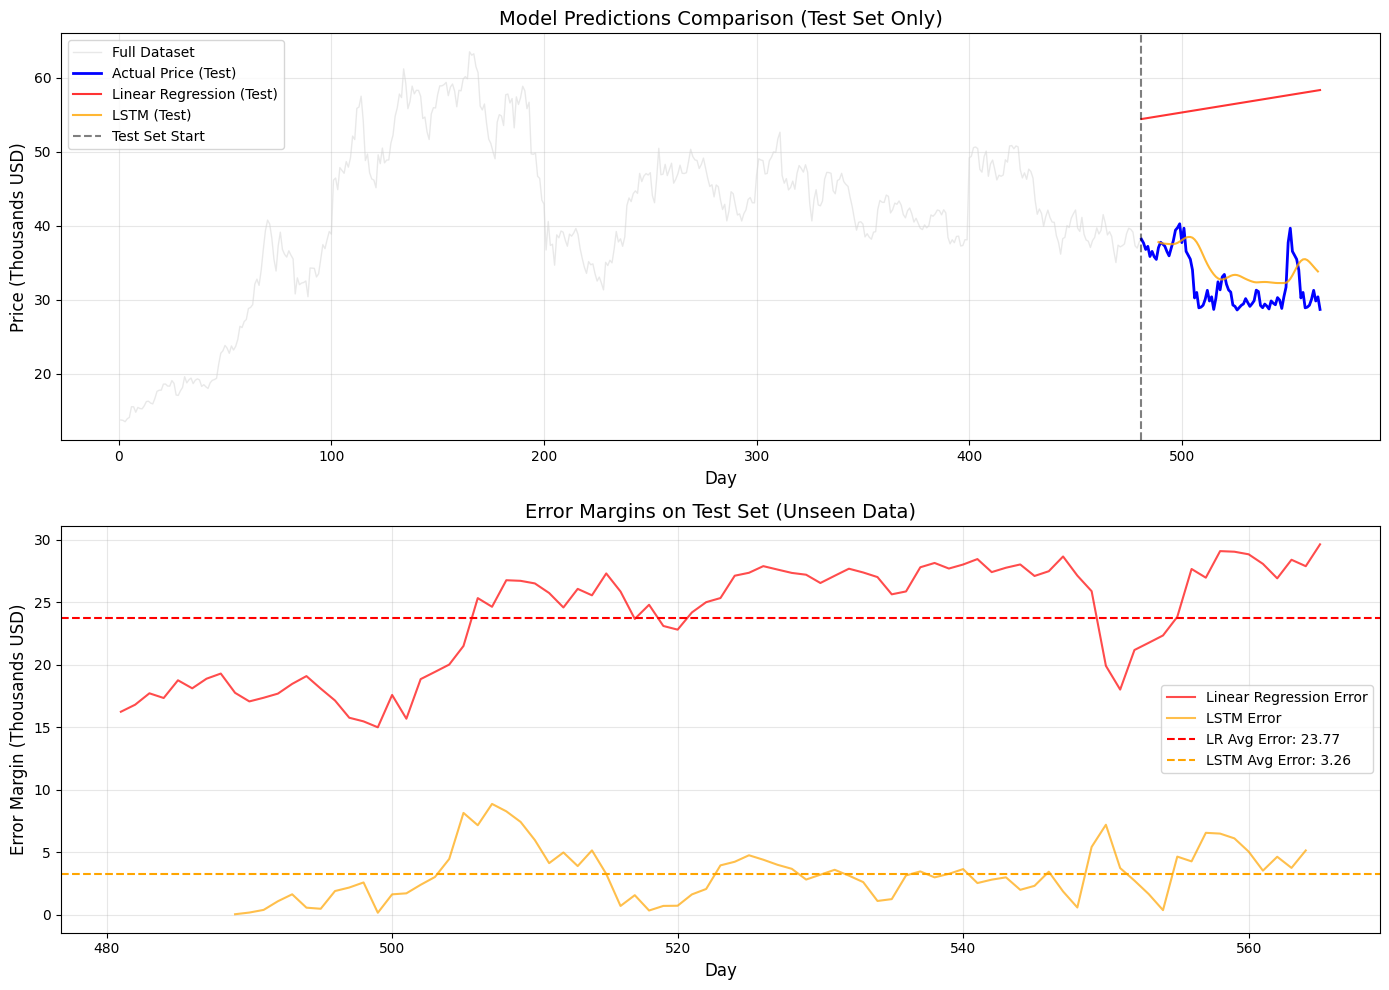

In [21]:
# Visualize both models together (TEST SET ONLY - proper ML practice)
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Get test set day indices
lr_test_days = X_test_lr.flatten()
lstm_test_days = list(range(test_start_idx, test_start_idx + len(y_pred_lstm)))

# Plot 1: Test set predictions comparison
axes[0].plot(df['Day'], df['Open'], color='lightgray', label='Full Dataset', linewidth=1, alpha=0.5)
axes[0].plot(lr_test_days, y_test_lr, color='blue', label='Actual Price (Test)', linewidth=2)
axes[0].plot(lr_test_days, y_pred_lr_test, color='red', label='Linear Regression (Test)', linewidth=1.5, alpha=0.8)
axes[0].plot(lstm_test_days, y_pred_lstm, color='orange', label='LSTM (Test)', linewidth=1.5, alpha=0.8)
axes[0].axvline(x=lr_test_days[0], color='black', linestyle='--', alpha=0.5, label='Test Set Start')
axes[0].set_xlabel('Day', fontsize=12)
axes[0].set_ylabel('Price (Thousands USD)', fontsize=12)
axes[0].set_title('Model Predictions Comparison (Test Set Only)', fontsize=14)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Plot 2: Error margins comparison (test set only)
axes[1].plot(lr_test_days, lr_errors, color='red', label='Linear Regression Error', linewidth=1.5, alpha=0.7)
axes[1].plot(lstm_test_days, lstm_errors, color='orange', label='LSTM Error', linewidth=1.5, alpha=0.7)
axes[1].axhline(y=lr_avg_error, color='red', linestyle='--', label=f'LR Avg Error: {lr_avg_error:.2f}')
axes[1].axhline(y=lstm_avg_error, color='orange', linestyle='--', label=f'LSTM Avg Error: {lstm_avg_error:.2f}')
axes[1].set_xlabel('Day', fontsize=12)
axes[1].set_ylabel('Error Margin (Thousands USD)', fontsize=12)
axes[1].set_title('Error Margins on Test Set (Unseen Data)', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

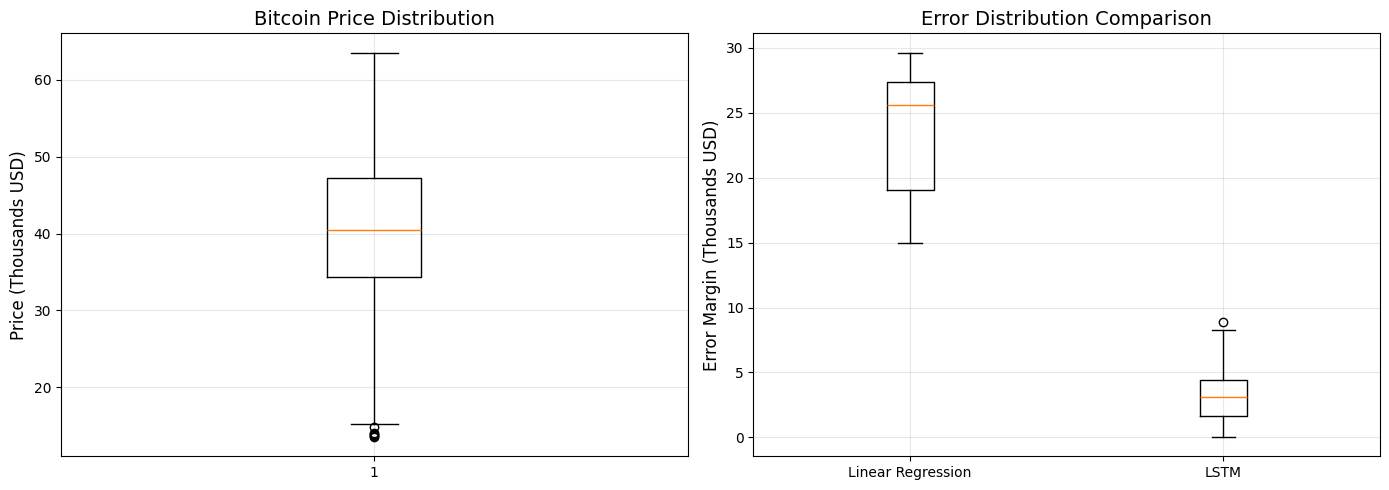


Outlier Analysis:
Q1: 34.32, Q3: 47.19, IQR: 12.87
Lower bound: 15.01, Upper bound: 66.50
Number of outliers: 6


In [22]:
# Box plot for outlier detection
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bitcoin prices box plot
axes[0].boxplot(df['Open'], vert=True)
axes[0].set_ylabel('Price (Thousands USD)', fontsize=12)
axes[0].set_title('Bitcoin Price Distribution', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Calculate outliers using IQR method
Q1 = df['Open'].quantile(0.25)
Q3 = df['Open'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Open'] < lower_bound) | (df['Open'] > upper_bound)]

# Error distribution comparison
axes[1].boxplot([lr_errors, lstm_errors], labels=['Linear Regression', 'LSTM'])
axes[1].set_ylabel('Error Margin (Thousands USD)', fontsize=12)
axes[1].set_title('Error Distribution Comparison', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOutlier Analysis:")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)}")

In [23]:
# Save comparison results to CSV
comparison_df.to_csv('data/prediction_results.csv', index=False)
print("Results saved to data/prediction_results.csv")

Results saved to data/prediction_results.csv


## 6. Conclusion

### Summary of Findings

In [24]:
# Final summary (using TEST SET metrics only - proper ML evaluation)
print("=" * 60)
print("FINAL SUMMARY (TEST SET EVALUATION)")
print("=" * 60)
print(f"\nDataset: Bitcoin prices from November 2020 to May 2022")
print(f"Total data points: {len(df)}")
print(f"Split: 70% train, 15% validation, 15% test")
print(f"Test set size: LR={len(y_test_lr)}, LSTM={len(y_test_lstm)} samples")
print(f"\n" + "-" * 60)
print("MODEL COMPARISON (UNSEEN TEST DATA)")
print("-" * 60)
print(f"\n{'Metric':<30} {'Linear Regression':>15} {'LSTM':>15}")
print(f"{'Average Error Margin':<30} {lr_avg_error:>15.4f} {lstm_avg_error:>15.4f}")
print(f"{'R-squared':<30} {r2_lr_test:>15.4f} {r2_lstm:>15.4f}")
print(f"{'MSE':<30} {mse_lr_test:>15.4f} {mse_lstm:>15.4f}")

# Determine winner
print(f"\n" + "-" * 60)
print("CONCLUSION")
print("-" * 60)
if lstm_avg_error < lr_avg_error:
    improvement = ((lr_avg_error - lstm_avg_error) / lr_avg_error) * 100
    print(f"\nLSTM outperforms Linear Regression by {improvement:.1f}%")
    print(f"LSTM average error: ${lstm_avg_error * 1000:.2f}")
    print(f"Linear Regression average error: ${lr_avg_error * 1000:.2f}")
else:
    print(f"\nLinear Regression performs comparably or better than LSTM")

print(f"\n" + "=" * 60)
print("These results are based on UNSEEN test data only,")
print("following proper ML evaluation practices.")
print("=" * 60)

FINAL SUMMARY (TEST SET EVALUATION)

Dataset: Bitcoin prices from November 2020 to May 2022
Total data points: 565
Split: 70% train, 15% validation, 15% test
Test set size: LR=85, LSTM=76 samples

------------------------------------------------------------
MODEL COMPARISON (UNSEEN TEST DATA)
------------------------------------------------------------

Metric                         Linear Regression            LSTM
Average Error Margin                   23.7654          3.2574
R-squared                             -43.7169         -0.2241
MSE                                   583.9721         15.0231

------------------------------------------------------------
CONCLUSION
------------------------------------------------------------

LSTM outperforms Linear Regression by 86.3%
LSTM average error: $3257.41
Linear Regression average error: $23765.35

These results are based on UNSEEN test data only,
following proper ML evaluation practices.


### Key Observations

1. **Linear Regression Limitations**:
   - The low R-squared value indicates the linear model cannot capture Bitcoin's volatility
   - Assumes prices will rise indefinitely (unrealistic)
   - More sensitive to outliers

2. **LSTM Advantages**:
   - Captures complex, non-linear patterns
   - More consistent error margins across the dataset
   - Better suited for time-series data with long-term dependencies

3. **Limitations to Consider**:
   - Potential overfitting in LSTM
   - External factors (news, regulations) not captured
   - Historical data may not predict future volatile movements